<p align="left">
	<img width="450" alt="logo" src="https://user-images.githubusercontent.com/76659596/117782464-f2240f80-b241-11eb-9991-6d99fc5bc0f1.png">
</p>

This notebook comprises the stock analysis of different beauty consumer companies and the impact caused on the stock data due to COVID-19 pandemic. Primarily, the stocks of the following companies have been considered for the analysis -

* M.A.C
* Estée Lauder Companies
* ULTA Beauty Inc.
* E.L.F Beauty Inc.
* Revlon Inc.

The stock data for the last 30 months have been extracted from `Yahoo Finance` using its Web APIs. 

## Data Extraction

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Data Extraction and Load
from pandas_datareader import data, wb
from datetime import datetime

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# AutoCompletion not enabled by default while working with Python 3.7.x using Jupyter
%config Completer.use_jedi = False

### Extract Stock Data using `Yahoo Finance` Stock API

Assuming pandemic lockdown started in `March, 2020` which is around `15 months` till now, the purpose is to prepare a nearly balanced dataset for normal time (non-pandemic lockdown) and pandemic time. Hence, the starting date of the stock under consideration is adjusted to `Dec 1, 2018`.

In [2]:
end_date = datetime.now()
start_date = datetime(2018, 12, 1)

In [3]:
def get_stock_data(ticker_symbol, source='yahoo'):
    return data.DataReader(ticker_symbol, source, start_date, end_date)

In [4]:
# M.A.C
MAC = get_stock_data('MAC')

# Estée Lauder Companies
EL = get_stock_data('EL')

# ULTA Beauty Inc.
ULTA = get_stock_data('ULTA')

# E.L.F Beauty Inc.
ELF = get_stock_data('ELF')

# Revlon Inc.
REV = get_stock_data('REV')

### Insight into respective dataframes

In [5]:
MAC.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,50.650002,50.119999,50.509998,50.639999,704100.0,41.531578
2018-12-04,50.880001,49.500000,50.639999,49.570000,1916300.0,40.654026


In [6]:
# check null entries
MAC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 2018-12-03 to 2021-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       612 non-null    float64
 1   Low        612 non-null    float64
 2   Open       612 non-null    float64
 3   Close      612 non-null    float64
 4   Volume     612 non-null    float64
 5   Adj Close  612 non-null    float64
dtypes: float64(6)
memory usage: 33.5 KB


In [7]:
EL.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,152.919998,144.220001,144.220001,152.649994,5296600.0,149.826050
2018-12-04,152.000000,144.059998,152.000000,144.089996,3101800.0,141.424423


In [8]:
# check null entries
EL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 2018-12-03 to 2021-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       612 non-null    float64
 1   Low        612 non-null    float64
 2   Open       612 non-null    float64
 3   Close      612 non-null    float64
 4   Volume     612 non-null    float64
 5   Adj Close  612 non-null    float64
dtypes: float64(6)
memory usage: 33.5 KB


In [9]:
ULTA.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,311.299988,302.470001,303.880005,306.489990,1384300,306.489990
2018-12-04,308.399994,289.209991,304.779999,291.130005,1653500,291.130005


In [10]:
# check null entries
ULTA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 2018-12-03 to 2021-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       612 non-null    float64
 1   Low        612 non-null    float64
 2   Open       612 non-null    float64
 3   Close      612 non-null    float64
 4   Volume     612 non-null    int64  
 5   Adj Close  612 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 33.5 KB


In [11]:
ELF.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,12.90,12.22,12.89,12.48,417800,12.48
2018-12-04,12.52,11.61,12.52,11.63,355800,11.63


In [12]:
# check null entries
ELF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 2018-12-03 to 2021-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       612 non-null    float64
 1   Low        612 non-null    float64
 2   Open       612 non-null    float64
 3   Close      612 non-null    float64
 4   Volume     612 non-null    int64  
 5   Adj Close  612 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 33.5 KB


In [13]:
REV.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,25.540001,24.17,25.059999,25.139999,112900,25.139999
2018-12-04,25.200001,22.42,25.190001,22.860001,229800,22.860001


In [14]:
# check null entries
REV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612 entries, 2018-12-03 to 2021-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       612 non-null    float64
 1   Low        612 non-null    float64
 2   Open       612 non-null    float64
 3   Close      612 non-null    float64
 4   Volume     612 non-null    int64  
 5   Adj Close  612 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 33.5 KB


### **Conclusion:** No null entries in any of the extracted dataframes 

## Add the company, lockdown and return columns for individual dataframes

### Add company column for each dataframe

In [15]:
company_dataframes = [MAC, EL, ULTA, ELF, REV]
company_names = ['MAC', 'EL', 'ULTA', 'ELF', 'REV']

for company_dataframe, company_name in zip(company_dataframes, company_names):
    company_dataframe["Company"] = company_name

### Adding return column for each dataframe
Create a new column 'Return' that will contain the returns for each company's stock. Return is typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$


In [16]:
for company_dataframe in company_dataframes:
    company_dataframe["Return"] = company_dataframe['Close'].pct_change()
    # dropping the first null entry in the return column
    company_dataframe.dropna(axis=0, inplace=True)

### Check the newly added columns in one dataframe

In [17]:
MAC.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2018-12-04,50.880001,49.500000,50.639999,49.570000,1916300.0,40.654026,MAC,-0.021130
2018-12-06,50.980000,48.590000,49.299999,50.919998,2659500.0,41.761208,MAC,0.027234
2018-12-07,51.080002,50.330002,50.740002,50.639999,1152800.0,41.531578,MAC,-0.005499
2018-12-10,50.689999,49.509998,50.650002,50.040001,798400.0,41.039497,MAC,-0.011848
2018-12-11,50.750000,49.270000,50.169998,49.320000,1556700.0,40.448997,MAC,-0.014389


### Concatenate all dataframes 

In [18]:
stock_data = pd.concat(company_dataframes, axis=0) # along row

### Disaply Concatenated Dataframe

In [19]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2018-12-04,50.880001,49.500000,50.639999,49.570000,1916300.0,40.654026,MAC,-0.021130
2018-12-06,50.980000,48.590000,49.299999,50.919998,2659500.0,41.761208,MAC,0.027234
2018-12-07,51.080002,50.330002,50.740002,50.639999,1152800.0,41.531578,MAC,-0.005499
2018-12-10,50.689999,49.509998,50.650002,50.040001,798400.0,41.039497,MAC,-0.011848
2018-12-11,50.750000,49.270000,50.169998,49.320000,1556700.0,40.448997,MAC,-0.014389


In [20]:
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2021-05-04,11.27,10.77,11.23,10.88,218000.0,10.88,REV,-0.026834
2021-05-05,11.50,10.89,10.89,11.21,85200.0,11.21,REV,0.030331
2021-05-06,11.43,10.80,11.09,11.38,129700.0,11.38,REV,0.015165
2021-05-07,11.68,11.12,11.29,11.17,162300.0,11.17,REV,-0.018453
2021-05-10,10.76,10.00,10.52,10.18,448500.0,10.18,REV,-0.088630


### Add Lockdown column

Assuming the lockdown has been started in `1st March, 2020`, the new `Lockdown` column will contain the values respectively, that is, if the date is greater than or equals to the pandemic start date, use 1, otherwise 0.

In [21]:
def is_lockdown(date):
    start_pandemic_date = datetime(2020, 3, 1)
    if date >= start_pandemic_date:
        return 1
    return 0

stock_data['Lockdown'] = stock_data.index
stock_data['Lockdown'] = stock_data['Lockdown'].apply(is_lockdown)

### Display the dataframe's head if the new Lockdown column is added properly

In [22]:
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Return,Lockdown
Date,,,,,,,,,
2018-12-04,50.880001,49.500000,50.639999,49.570000,1916300.0,40.654026,MAC,-0.021130,0
2018-12-06,50.980000,48.590000,49.299999,50.919998,2659500.0,41.761208,MAC,0.027234,0
2018-12-07,51.080002,50.330002,50.740002,50.639999,1152800.0,41.531578,MAC,-0.005499,0
2018-12-10,50.689999,49.509998,50.650002,50.040001,798400.0,41.039497,MAC,-0.011848,0
2018-12-11,50.750000,49.270000,50.169998,49.320000,1556700.0,40.448997,MAC,-0.014389,0


### Display the dataframe's tail if the new Lockdown column is added properly

In [23]:
stock_data.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Return,Lockdown
Date,,,,,,,,,
2021-05-04,11.27,10.77,11.23,10.88,218000.0,10.88,REV,-0.026834,1
2021-05-05,11.50,10.89,10.89,11.21,85200.0,11.21,REV,0.030331,1
2021-05-06,11.43,10.80,11.09,11.38,129700.0,11.38,REV,0.015165,1
2021-05-07,11.68,11.12,11.29,11.17,162300.0,11.17,REV,-0.018453,1
2021-05-10,10.76,10.00,10.52,10.18,448500.0,10.18,REV,-0.088630,1


### Display the statistics of the dataframe

In [24]:
stock_data.groupby('Company').describe().transpose()

Company                 EL         ELF         MAC         REV        ULTA
High     count  611.000000  611.000000  611.000000  611.000000  611.000000
         mean   204.334714   17.282403   22.963552   16.806481  277.014582
         std     44.430903    5.551898   13.785082    6.641859   51.155826
         min    125.360001    7.990000    5.200000    4.210000  149.059998
         25%    172.855003   12.728000    9.365000   11.280000  237.040001
...                    ...         ...         ...         ...         ...
Lockdown min      0.000000    0.000000    0.000000    0.000000    0.000000
         25%      0.000000    0.000000    0.000000    0.000000    0.000000
         50%      0.000000    0.000000    0.000000    0.000000    0.000000
         75%      1.000000    1.000000    1.000000    1.000000    1.000000
         max      1.000000    1.000000    1.000000    1.000000    1.000000

[64 rows x 5 columns]

### Display the dataframe information 

In [25]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3055 entries, 2018-12-04 to 2021-05-10
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       3055 non-null   float64
 1   Low        3055 non-null   float64
 2   Open       3055 non-null   float64
 3   Close      3055 non-null   float64
 4   Volume     3055 non-null   float64
 5   Adj Close  3055 non-null   float64
 6   Company    3055 non-null   object 
 7   Return     3055 non-null   float64
 8   Lockdown   3055 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 238.7+ KB


### **Conclusion:**  No null entries in the concatenated `stock_data` dataframe.

## Data Visualization

### Plot closing prices and its moving averages

#### **Question:** Change of stock over the total duration considered and the trend of moving averages of various stocks

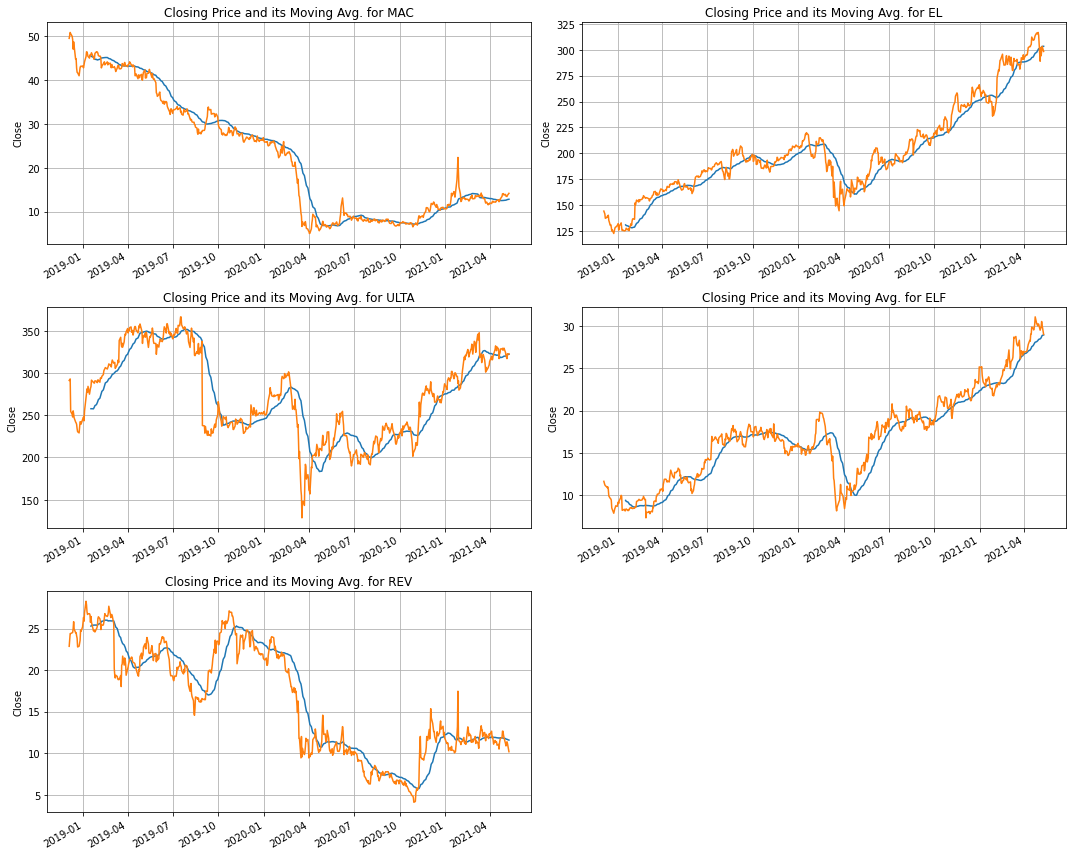

In [26]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_dataframes):
    plt.subplot(3, 2, i+1)
    company['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
    company['Close'].plot(label='Closing Price')
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.grid()
    plt.title(f"Closing Price and its Moving Avg. for {company_names[i]}")
    
plt.tight_layout()

### **Conclusion:** 

As noticed, for every company, the stocks dropped in the period (March-April, 2020) when the lockdown had begun. In particular, for `REVLON`, there is a second drop around September-October, 2020 after the lockdown started which was caused by some restructuring in the company (as per news). We can verify this further by finding out the exact date for the drop of stock prices during the lockdown.

## Minimum closing stock prices of respective companies

### MAC - Minimum Closing Stock Price (whole duration)

In [27]:
MAC[MAC['Close'] == MAC['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-04-02,5.77,4.85,5.51,5.02,6842100.0,4.637582,MAC,-0.098743


### MAC - Minimum Closing Stock Price (during lockdown)

Starting with 1 month earlier than the assumed lockdown start date (`1 March, 2020`)

In [28]:
MAC[MAC['Close'] == MAC.loc[datetime(2020,2,1):datetime(2021,5,10)]['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-04-02,5.77,4.85,5.51,5.02,6842100.0,4.637582,MAC,-0.098743


### EL - Minimum Closing Stock Price (whole duration)

In [29]:
EL[EL['Close'] == EL['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2018-12-24,125.360001,122.040001,125.339996,122.459999,858800.0,120.194557,EL,-0.026705


### EL - Minimum Closing Stock Price (during lockdown)

In [30]:
EL[EL['Close'] == EL.loc[datetime(2020,2,1):datetime(2021,5,10)]['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-03-23,151.970001,140.320007,149.779999,144.380005,2868200.0,143.491623,EL,-0.043841


### ULTA - Minimum Closing Stock Price (whole duration)

In [31]:
ULTA[ULTA['Close'] == ULTA['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-03-18,149.059998,124.050003,144.720001,128.520004,2367200,128.520004,ULTA,-0.168693


### ULTA - Minimum Closing Stock Price (during lockdown)

In [32]:
ULTA[ULTA['Close'] == ULTA.loc[datetime(2020,2,1):datetime(2021,5,10)]['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-03-18,149.059998,124.050003,144.720001,128.520004,2367200,128.520004,ULTA,-0.168693


### ELF - Minimum Closing Stock Price (whole duration)

In [33]:
ELF[ELF['Close'] == ELF['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2019-02-27,7.99,6.705,7.2,7.3,3814200,7.3,ELF,-0.229958


### ELF - Minimum Closing Stock Price (during lockdown)

In [34]:
ELF[ELF['Close'] == ELF.loc[datetime(2020,2,1):datetime(2021,5,10)]['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-03-18,8.576,7.87,8.03,8.13,1355900,8.13,ELF,-0.043529


### REV - Minimum Closing Stock Price (whole duration)

In [35]:
REV[REV['Close'] == REV['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-10-30,4.99,3.97,4.63,4.1,598700,4.1,REV,-0.114471


### REV - Minimum Closing Stock Price (during lockdown)

For `REVLON`, since we have seen that the biggest drop happend in `September-October, 2020`, here we are looking further into the first drop after the lockdown has started.

In [36]:
REV[REV['Close'] == REV.loc[datetime(2020,2,1):datetime(2020,5,1)]['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2020-04-01,10.51,9.43,10.23,9.43,78600,9.43,REV,-0.137237


### **Conclusion:** 

Now we can confirm that within a period of about 2 weeks (`mid March, 2020 to early April, 202`), all companies encountered a significant drop on their stock prices.

## Maximum closing stock prices of respective companies

**Question:** Highest closing price after the lockdown had started

### MAC - Maximum Closing Stock Price (during lockdown)

In [37]:
MAC[MAC['Close'] == MAC.loc[datetime(2020,4,2):datetime(2021,5,10)]['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2021-01-27,25.99,18.57,21.110001,22.379999,58466600.0,21.869526,MAC,0.150051


### EL - Maximum Closing Stock Price (during lockdown)

In [38]:
EL[EL['Close'] == EL.loc[datetime(2020,3,23):datetime(2021,5,10)]['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2021-04-29,318.339996,314.980011,315.429993,316.75,1162200.0,316.75,EL,0.003962


### ULTA - Maximum Closing Stock Price (during lockdown)

In [39]:
ULTA[ULTA['Close'] == ULTA.loc[datetime(2020,3,18):datetime(2021,5,10)]['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2021-03-11,351.0,341.290009,343.0,347.5,1357900,347.5,ULTA,0.012706


### ELF - Maximum Closing Stock Price (during lockdown)

In [40]:
ELF[ELF['Close'] == ELF.loc[datetime(2020,3,18):datetime(2021,5,10)]['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2021-04-23,31.290001,30.120001,30.25,31.120001,612700,31.120001,ELF,0.029782


### REV - Maximum Closing Stock Price (during lockdown)

For `REVLON` specifically, time window is chosen from `November, 2020` (to avoid the stock price drop in `
September-October, 2020`) to till date.

In [41]:
REV[REV['Close'] == REV.loc[datetime(2020,11,1):datetime(2021,5,10)]['Close'].max()]

,High,Low,Open,Close,Volume,Adj Close,Company,Return
Date,,,,,,,,
2021-01-27,19.0,14.38,17.709999,17.459999,2839600,17.459999,REV,0.321726


### **Conclusion:** 

All companies have experienced a huge leap in closing stock prices during either `Jan, 2021` or `March-April, 2021`. Some of these periods coincide with popular beauty sales (such as, `SEPHORA Spring Sale`).

### Pair Plot 

To quickly visualize the correlation between the columns

In [ ]:
sns.pairplot(stock_data,hue='Lockdown')

### Plot Total Volume of Stock

**Question:** Trend in volume traded over the whole duration considered

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_dataframes):
    plt.subplot(3, 2, i+1)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.grid()
    plt.title(f"Volume traded by {company_names[i]}")
    
plt.tight_layout()

### **Conclusion:** 

All companies encountered a spike in the volume of stocks traded within the period of about `Dec, 2020 to end of April, 2021` after the lockdown has started. This trend aligns with our previous conclusion.

## Plot Daily Return

**Question:** Daily return of stock

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_dataframes):
    plt.subplot(3, 2, i+1)
    company['Return'].plot(label='Daily Return', linestyle='dashed', marker = 'o')
    plt.ylabel('Return')
    plt.xlabel(None)
    plt.grid()
    plt.title(f"Daily Return for {company_names[i]}")
    
plt.tight_layout()

## Plot Heatmap Correlation Matrix

**Question:** see correlation in closing price between companies

In [ ]:
corr_df = pd.DataFrame()

In [ ]:
for company_dataframe, company_name in zip(company_dataframes, company_names):
    corr_df[company_name] = company_dataframe['Close']

In [ ]:
corr_df.head()

In [ ]:
sns.heatmap(corr_df.corr(), annot=True)

## Plot Standard Deviation of Return

**Question:** Checking the standard deviation of the return of the companies. Narrower the width, lesser the risk. 

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_dataframes):
    plt.subplot(3, 2, i+1)
    sns.distplot(company['Return'], bins=100, color='purple')
    #plt.hist(company['Return'])
    #plt.displot(company['Return'])
    #company['Return'].plot(label='Daily Return', linestyle='dashed', marker = 'o')
    plt.ylabel('Return')
    plt.xlabel(None)
    plt.grid()
    plt.title(f"Daily Return for {company_names[i]}")
    
plt.tight_layout()

## Model Training

### Create new dataframe with only the `Close` column

In [ ]:
data = stock_data[stock_data['Company'] == 'MAC'].filter(['Close'])

### Convert the dataframe to a numpy array

In [ ]:
dataset = data.values

### Prepare the training data by selecting a data range from starting date to any dat`

`31st December, 2020` has been selected as the end date

In [ ]:
# Get the number of rows to train the model on
training_data_len = len(data.loc[start_date:datetime(2020, 12, 31)])

In [ ]:
training_data_len

### Feature Scaling

* Use `MinMaxScalar` normalization for feature scaling within a range given

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

### Create the scaled training dataset

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

### Time step configuration 

Used for RNN LSTM to look back for predicting the future values. `45 days` and `60 days` have been tested and `60 days` has been found to be the better performant

In [ ]:
TIME_STEPS = 60

### Prepare Train and Test Splits

* Creating a data structure with `TIME_STEPS` timesteps (look back `TIME_STEPS` no of days) and 1 output
* This informs the RNN what to remember (number of timesteps) when predicting the next closing stock price
* The wrong number of timesteps can lead to overfitting or prone to errors

In [ ]:
# 'x_train' Input with TIME_STEPS previous days' stock prices
X_train = []
# 'y_train' Output with next day's stock price
y_train = []

for i in range(TIME_STEPS, len(train_data)):
    X_train.append(train_data[i-TIME_STEPS:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshape the data

3 dimensional array is required for LSTM model

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

### RNN Model

Regression is when we predict a continuous value. Here a RNN model with LSTM layer is used that can remember the trend/characteristics of sequences to perform future predictions. Here, closing stock prices of the last `60 days` are used to predict the next closing price.

In [ ]:
regressor = Sequential()

In [ ]:
# First LSTM layer and some Dropout regularisation
# 'units' is the number of LSTM Memory Cells (Neurons) for higher dimensionality
# 'return_sequences = True' because we will add more stacked LSTM Layers
# 'input_shape' of x_train
regressor.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# 20% of Neurons will be ignored to prevent overfitting
regressor.add(Dropout(0.2))

# Second LSTM layer with 64 neurons and further used 20% drop of neurons  
regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.2))

# Dense layer with 64 neurons
regressor.add(Dense(units = 64))

# Output layer
# 'units = 1' because Output layer has one dimension
regressor.add(Dense(units = 1))

# Compiling the RNN
# 'adam' optimizer is chosen
# loss = 'mean_squared_error' as it is good for regression
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.summary()

### Fitting RNN to Training Set

In [ ]:
regressor.fit(X_train, y_train, epochs=25, batch_size=32)

### Prepare Test Data 

* Create a new array containing scaled values 
* Chose the next values after the first set of values that are used as training data 

In [ ]:
test_data = scaled_data[training_data_len - TIME_STEPS: , :]

In [ ]:
# Create the datasets X_test and y_test
X_test = []
y_test = dataset[training_data_len:, :]

In [ ]:
y_test.shape

In [ ]:
for i in range(TIME_STEPS, len(test_data)):
    X_test.append(test_data[i-TIME_STEPS:i, 0])

### Conversion to numpy array

In [ ]:
X_test = np.array(X_test)

In [ ]:
X_test.shape

###  Reshaping (add third dimension for LSTM requirement)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Model Prediction

In [ ]:
predictions = regressor.predict(X_test)
predictions = scaler.inverse_transform(predictions)

### Root Mean Squared Error (RMSE)

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

### Plot Predictions

In [ ]:
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions

### Check few Predictions

In [ ]:
test.head(5)

### Visualize the Predictions

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['train_data_true', 'test_data_true', 'test_data_pred'], loc='lower right')
plt.grid()
plt.show()

### Future Work

Further enhancements can be applied to the model optimization with proper hyper parameter tuning using callbacks to reduce the error further without overfitting.

## Overall Conclusion

Even though the beauty industry has been affected due to COVID-19 pandemic, the companies started to recover since last quarter as people started taking care of their health and wellness. In addition, in the pandemic period, the online retail purchases have been increased due to the difficulty of people to shop in physical retail stores. Slowly I believe the industry will be reinstated.